In [ ]:
"""
    Implemented SGD based on loss function for linear regression
"""

In [892]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [902]:
#Function that computes partial differentiation of L w.r.t w
def diff_l_w(x,y,k,w,b):
    val=0
    for i in range(k):
        val+=(-2*x[i])*(y[i]-np.dot(w,x[i])-b)
    val=val/k
    return val

#Function that computes partial differentiation of L w.r.t b
def diff_l_b(x,y,k,w,b):
    val=0
    for i in range(k):
        val+=(-2)*(y[i]-np.dot(w,x[i])-b)
    val=val/k
    return val


#This would return us weight vector(w) and intercept(b)
#For SGD implementation k value is fixed at 50 which would be sampled randomly in each iteration
def fit(x,y,iteration=100,k=50):
    
    #initialization
    n,d=x.shape
    w=np.random.rand(1,d)
    b=0
    niter=1
    r=1 # learning rate
    
    
    
    while(niter<iteration):
        #selecting k random data points
        idx=np.random.choice(x.shape[0], k, replace=False)
        x_k=x[idx]
        y_k=y[idx]

        #assigning old weight and bias
        w_old=w
        b_old=b
        
        #calculating partial derivative using function
        diff_w=diff_l_w(x_k,y_k,k,w_old,b_old)
        diff_b=diff_l_b(x_k,y_k,k,w_old,b_old)
        #print("Diff ",diff_w,diff_b)
        
        #calculating new weight and bias
        w=w_old-(r*diff_w)
        b=b_old-(r*diff_b)
        #print("val ",w,b)
        if (w_old==w).all():
            #print(w,b)
            #print(w_old,b_old)
            #print(niter)
            break
        
        #r=r/2 #changing the learning rate
        
        # Based on invscaling learning rate - eta0 0.2(0.01 default),power_t 0.5
        r = 0.2 / (niter ** 0.5)
        niter+=1
        #print(r)
    return w,b

#predict function would take x,w and b as input and return the predicted values for x
def predict(x,w,b):
    yhat_list=[]
    #print("W ",w,"\nb ",b)
    for i in x:
        #print(" X :",i)
        yhat = b.copy()
        yhat += np.dot(w,i)
        #print("Pred :",yhat)
        yhat_list.append(float(yhat))
    return yhat_list

<h4> Loading the data </h4>

In [903]:
X = load_boston().data
Y = load_boston().target

In [904]:
#scaling the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

<h4> Using sklearn implementation </h4>

In [905]:
#Using sklearn function
clf = SGDRegressor()
clf.fit(X, Y)
y_pred_sklearn=clf.predict(X)
print("Sklearn SGDRegressor -> mean squared error: ",mean_squared_error(Y, clf.predict(X)))

Sklearn SGDRegressor -> mean squared error:  22.961528742228293


Sklearn SGDRegressor


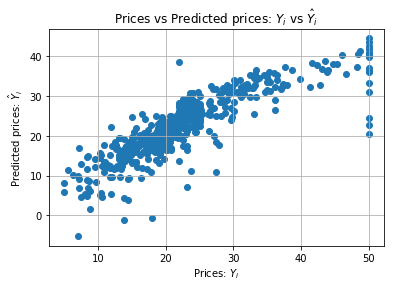

In [906]:
print("Sklearn SGDRegressor")
plt.scatter(Y, y_pred_sklearn)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.grid()
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

<h4> Using above implemented functions </h4>

In [907]:
#Using above implemented functions
w,b=fit(X,Y,iteration=1000) 
print("From above implemtation\nw ",w,"\nb :",b)
print("\nSGD regressor : \nw: ", clf.coef_ ,"\nb:",clf.intercept_)
y_pred_implemented=predict(X,w[0],b)
print("Above implementation -> mean squared error: ",mean_squared_error(Y,y_pred))

From above implemtation
w  [[-0.8534915   1.04180843 -0.12095136  0.72550781 -1.87724571  2.83522603
  -0.14668022 -3.11767453  2.10629757 -1.49729269 -2.00529417  0.88410237
  -3.7332818 ]] 
b : [22.52614761]

SGD regressor : 
w:  [-0.75362263  0.63454393 -0.42637732  0.8021617  -1.01109142  3.19652258
 -0.2572233  -2.07483893  0.774089   -0.57966123 -1.81458047  0.89000739
 -3.44759324] 
b: [22.32663298]
Above implementation -> mean squared error:  21.980414928818234


Above implementation


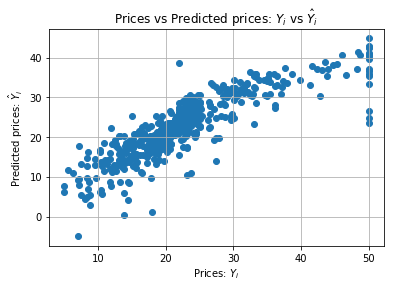

In [908]:
print("Above implementation")
plt.scatter(Y, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

<h3> Comparison </h3>

<h4> W and b values</h4>

In [909]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
pos = PrettyTable()
pos.field_names = ["Sklearn", "Above implementation"]
pos.add_row(["B value:",""])
pos.add_row([clf.intercept_,b])
pos.add_row(["W value:",""])
for i in range(len(w[0])):
    pos.add_row([clf.coef_[i],w[0][i]])
print(pos)

+---------------------+----------------------+
|       Sklearn       | Above implementation |
+---------------------+----------------------+
|       B value:      |                      |
|    [22.32663298]    |    [22.52614761]     |
|       W value:      |                      |
| -0.7536226269197488 | -0.8534914993540725  |
|  0.6345439287373515 |  1.0418084305629236  |
| -0.4263773212770907 | -0.12095135610221336 |
|  0.8021616968017958 |  0.7255078069799018  |
| -1.0110914155946313 |  -1.877245711046955  |
|  3.196522578397554  |  2.835226032465963   |
| -0.2572232980034964 | -0.14668021973780862 |
| -2.0748389264027507 |  -3.117674532745802  |
|  0.7740889952815311 |  2.106297570824644   |
| -0.5796612325968884 | -1.4972926945477503  |
| -1.8145804653696365 |  -2.005294174884483  |
|  0.8900073929868297 |  0.8841023664262676  |
| -3.4475932406043324 | -3.7332817958580224  |
+---------------------+----------------------+


<h4>Mean squared error</h4>

In [910]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
pos = PrettyTable()
pos.field_names = ["Sklearn", "Above implementation"]
pos.add_row([mean_squared_error(Y, clf.predict(X)),mean_squared_error(Y,y_pred)])
print(pos)


+--------------------+----------------------+
|      Sklearn       | Above implementation |
+--------------------+----------------------+
| 22.961528742228293 |  21.980414928818234  |
+--------------------+----------------------+
